# King County Home Sales Analysis

## Overview

The project analyzes data from home sales in King County in order to gain insights into what characteristics of a home contribute to higher sales prices. The insights gained through this analysis are aimed towards helping real estate companies better predict and gage value of the homes they are selling. 

## Business Problem

As a real estate company it is important to have accurate prices that benefit both sellers and buyers. By having accurate prices, a real estate company can establish a reputation for transparency and trustworthiness in the community. Moreover, accurate prices, over the long run, will create greater profit for they will equalize undervalued and overvalued homes to create a more balanced profit margin.  

## Data Understanding

The dataset contains 21,597 entries of home sales in King County. The dataset recorded home sales between May 2014 and 2015. The original dataset contained 21 columns, each describing an attribute of the home that was sold (e.g., number of bedrooms, total square feet, year built, overall condition, etc.).  

In [1]:
#importing relevant modules
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


In [2]:
#loading dataset and column names
df = pd.read_csv('./home_sales_analysis/data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Preparation

To begin the data cleaning process, the data was observed broadly to understand the data. Specifically I wanted to learn more about the following:

1. To see if any columns could be dropped due to irrelevance to the business question.
2. To understand what types of data types were within each column and if these needed to be changed.
3. To learn what columns had missing values, improper formatting, or placeholders.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#checking each columns most common values to check for placeholders/outliers
for col in df.columns:
    if col:
        try:
            print(col, df[col].value_counts()[:5])
        except:
            print(col, df[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

### Data Cleaning

#### Step 1: Dropping Irrelevant Columns

Based on preliminary investigation of the data, several columns were dropped due to irrelevance . 

The removed columns include: *lat, long, sqft_lot15, sqft_living15, sqft_above, and sqft_basement*.

These columns were removed for the following reasons:
* <u>*waterfront*</u> was removed because very few data entries qualified for waterfront. Only 146 out of 19921 (.0007%) entries with non-null values were waterfront properties. Making it an unlikely contributor to influencing price.
* <u>*lat*</u> and <u>*long*</u> were removed since the global coordinates of a house did not seem relevant to the current business question since all homes are located in the same general area. 
* <u>*sqft_above*</u>, <u>*sqft_lot15*</u>, <u>*sqft_living15*</u>, and <u>*sqft_basement*</u> were redundant categories which are better represented in the columns <u>*sqft_living*</u> and <u>*sqft_lot*</u>.

In [6]:
#dropping irrelevant columns
dropped_columns = ['lat', 'long', 'waterfront','sqft_lot15', 
                  'sqft_living15','sqft_above', 'sqft_basement']

df.drop(dropped_columns, axis=1, inplace=True)

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated,zipcode
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1955,0.0,98178
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,1951,1991.0,98125
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,1933,NaN,98028
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1965,0.0,98136
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1987,0.0,98074


#### Step 1a: Feature Engineering Date Column

It was decided to feature engineer the date column by dividing the sell-date into the four seasons (fall, winter, spring, summer) to see if the time of year a home is sold contributes to its selling price. 

Each of the seasons was broken down as follows:
- Fall: (09/01 - 11/30) or (week 36-48)
- Winter: (12/01 - 02/28) or (week 49-52, 1-8)
- Spring:(03/01 - 05/31) (week 9-22)
- Summer: (06/01 - 08/31)or (week 23-35)


In [8]:
df['date'].value_counts()

6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
             ... 
11/30/2014      1
8/3/2014        1
11/2/2014       1
1/17/2015       1
1/10/2015       1
Name: date, Length: 372, dtype: int64

In [9]:
#converting column to datetime dtype
#df['date'] = pd.to_datetime(df['date'])

In [10]:
#df['weeks'] = df['date'].dt.week

In [11]:
# def season_sorter(series):
#     for week in series:
#         if (week > 35) & (week < 48):
#             week = 'Fall'
#         elif ((week > 48 & week <=52) | week <= 8):
#             week = 'Winter'
#         elif (week > )

In [12]:
#df['weeks'].apply(season_sorter)

#### Step 2: Dealing with Null Values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21597 non-null  int64  
 1   date          21597 non-null  object 
 2   price         21597 non-null  float64
 3   bedrooms      21597 non-null  int64  
 4   bathrooms     21597 non-null  float64
 5   sqft_living   21597 non-null  int64  
 6   sqft_lot      21597 non-null  int64  
 7   floors        21597 non-null  float64
 8   view          21534 non-null  object 
 9   condition     21597 non-null  object 
 10  grade         21597 non-null  object 
 11  yr_built      21597 non-null  int64  
 12  yr_renovated  17755 non-null  float64
 13  zipcode       21597 non-null  int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 2.3+ MB


**yr_renovated**

For yr_renovated there are 3842 null values. This is a large number and accounts for 17% of the 21,597 entries.

When looking at the data, 0.00 seems to be a placeholder for homes that have not been renovated. This placeholder accounts for 17,011 entries. When combined, these null values/placeholders account for 20,853 out of the 21,597 entries.

Since it may still be useful to know whether or not a home was renovated, yr_renovated was transformed into the binary variable renovated_cat that applied 1's to homes that had been renovated after 2000 (last 15 years of the dataset) and applied 0's to homes that were either not renovated or renovated before 2005. After this, the yr_renovated column was dropped.

**view**

For the view column there are only 63 null values, accounting for 0.0003% of total entries, so these null values were simply dropped.

In [14]:
#detecting which columns have null/missing values
df.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
view              63
condition          0
grade              0
yr_built           0
yr_renovated    3842
zipcode            0
dtype: int64

In [15]:
#observing minimum and maximum values to look for potential placeholders
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,17755.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,83.636778,98077.951845
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,399.946414,53.513072
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,0.000000,98001.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,0.000000,98033.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,0.000000,98065.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,0.000000,98118.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,2015.000000,98199.000000


In [16]:
#filling na values with 0.00 and creating a new categorical column
df['renovated_cat'] = df['yr_renovated'].fillna(0.00)

In [17]:
#new column accounts for homes that were a.) renovated and b.) renovated in
#the last 15 years (2000 or later)
df['renovated_cat'] = df['renovated_cat'].map(lambda x: 1 if x > 2000 else 0)

df['renovated_cat'].value_counts()

0    21247
1      350
Name: renovated_cat, dtype: int64

In [18]:
#dropping yr_renovated since it is no longer needed
df.drop('yr_renovated', axis=1, inplace=True)

In [19]:
#dropping the 63 null values in the view column
df.dropna(subset=['view'], inplace=True)

In [20]:
#double-checking all na values are taken care of
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
yr_built         0
zipcode          0
renovated_cat    0
dtype: int64

### Step 3: Dealing with Outliers in Predictor Variables (sales)

#### Step 3: Transforming and Normalizing Continuous Data

With the data mostly clean, the variables are visualized using histograms. These visualizations help to assess whether variables are categorical or continuous. The visualizations also aid in determining whether or not the continuous variables are normally distributed or skewed.

In the case of the data below, most of the continuous variables are positively skewed with some extreme outliers positioned to the right of the graph. The positive skew is particularly apparent with sqft_lot, price, and sqft_living. With such a strong skew, the residuals are bound to be problematic for linear regression.

However, prior to addressing this, a baseline model was created to determine if log scaling has any impact on model effectiveness. For the baseline model, the continuous variables were scaled using normalization (mean=0, SD=1).

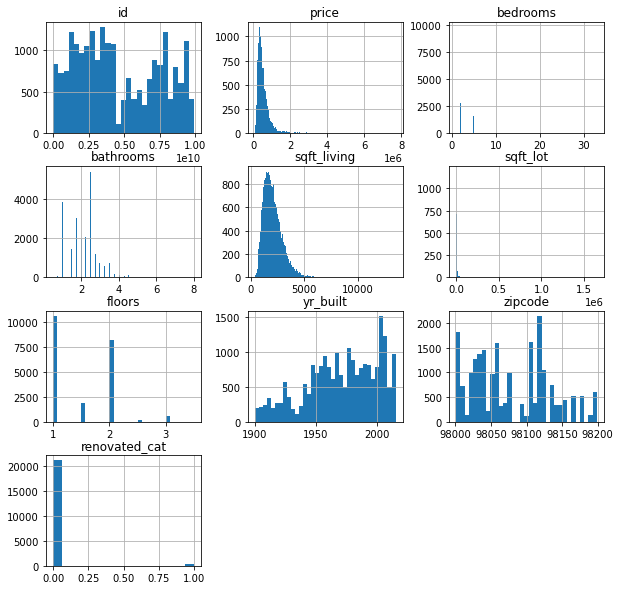

In [21]:
#using visualizations to determine if columns continuous or categorical
#also to check if data is skewed or not and in need of transformations
df.hist(figsize=[10, 10], bins='auto');

In [22]:
#only sqft_living, sqft_lt, price, and yr_built are continuous variables

#splitting columns into categorical or cont variables
cont = ['price','sqft_living', 'yr_built', 'sqft_lot']
categ = ['bedrooms', 'bathrooms', 'zipcode', 'floors', 'renovated_cat', 'grade',
        'condition', 'view']

df_cont = df[cont]
df_categ = df[categ]

#### Step 4: One-Hot Encoding Categorical Data

In [24]:
#performing ohe for categorical variables
categ_dummies = pd.get_dummies(df_categ, drop_first=True)

#### Step 5: Combining Features into Baseline Dataframe

In [63]:
#concatinating categorical and continuous vars into baseline model
preprocessed = pd.concat([df_cont, categ_dummies], axis=1)

## Data Exploration

With scrubbed data, the data frame is now explored to check for multicolinearity and drop offending columns.

### Checking for Multicollinearity

Using seaborn heatmapping, two features appear to be correlated:

1.) bathrooms and sqft_living (r=.76),

This correlation with makes logical sense. As the number of bathrooms increase, so too does the square footage of a house. More bathrooms equals more square footage. Since this relationship makes sense, it was decided not to remove either of the correlated pairs.

In [64]:
#columns of predictor variables.
columns = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'yr_built', 'renovated_cat']

predictors = preprocessed[columns]

#producing correlations b/w predictor variables
corr = predictors.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,renovated_cat
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.054273,0.103149
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,0.155462,0.032681
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.507565,0.058176
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.318217,0.046924
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.052646,-0.014390
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.489410,0.002760
yr_built,0.054273,0.155462,0.507565,0.318217,0.052646,0.489410,1.000000,-0.122817
renovated_cat,0.103149,0.032681,0.058176,0.046924,-0.014390,0.002760,-0.122817,1.000000


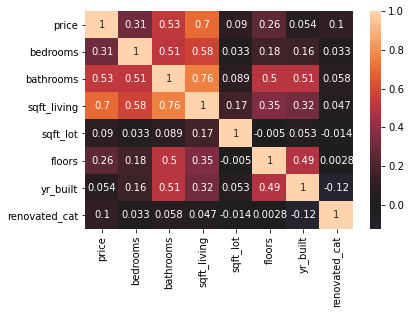

In [65]:
#sns heatmap - produces better visualization than above table
sns.heatmap(corr, center=0, annot=True);

## Data Modeling and Evaluation

### Splitting Data into Training and Test Data

In [66]:
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

In [67]:
#splitting into train-test variables utilizing standared 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [68]:
print(len(X_train), len(X_test))

16150 5384


### Baseline Model

In [69]:
#adding a constant to attain y-intecept
X = sm.add_constant(X_train)

baseline_model = sm.OLS(y_train, X).fit()

baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1297.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:45:48   Log-Likelihood:            -2.2075e+05
No. Observations:               16150   AIC:                         4.416e+05
Df Residuals:                   16124   BIC:                         4.418e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.253e+07   3.43e+06      3.656      0.000    5.81e+06    1.93e+07
sqft_living           136.2401      3.847     35.412      0.000     128.699     143.781
yr_built            -3205.2128     82.360    -38.917      0.000   -3366.647   -3043.779
sqft_lot               -0.2950      0.043     -6.833      0.000      -0.380      -0.210
bedrooms             -2.98e+04   2436.025    -12.232      0.000   -3.46e+04    -2.5e+04
bathrooms            4.909e+04   3906.492     12.567      0.000    4.14e+04    5.68e+04
zipcode               -57.6119     34.372     -1.676      0.094    -124.985       9.762
floors                3.58e+04   3922.461      9.127      0.000    2.81e+04    4.35e+04
renovated_cat        1.091e+05   1.33e+04      8.214      0.000    8.31e+04    1.35e+05
grade_11 Excellent   2.879e+05   1.44e+04     19.957      0.000     2.6e+05    3.16e+05
grade_12 Luxury      7.153e+05   2.75e+04     25.984      0.000    6.61e+05    7.69e+05
grade_13 Mansion     1.185e+06    7.5e+04     15.799      0.000    1.04e+06    1.33e+06
grade_3 Poor         2.766e-11   2.62e-11      1.055      0.292   -2.37e-11    7.91e-11
grade_4 Low         -5.674e+05   4.83e+04    -11.749      0.000   -6.62e+05   -4.73e+05
grade_5 Fair        -5.534e+05   1.91e+04    -29.033      0.000   -5.91e+05   -5.16e+05
grade_6 Low Average -4.878e+05   1.18e+04    -41.480      0.000   -5.11e+05   -4.65e+05
grade_7 Average      -4.07e+05   9630.290    -42.260      0.000   -4.26e+05   -3.88e+05
grade_8 Good        -3.202e+05   8804.108    -36.365      0.000   -3.37e+05   -3.03e+05
grade_9 Better      -1.849e+05   8790.974    -21.031      0.000   -2.02e+05   -1.68e+05
condition_Fair      -2.926e+04   1.96e+04     -1.496      0.135   -6.76e+04    9067.534
condition_Good       1.631e+04   4177.375      3.903      0.000    8117.628    2.45e+04
condition_Poor      -3.278e+04   4.49e+04     -0.730      0.465   -1.21e+05    5.53e+04
condition_Very Good   6.02e+04   6658.156      9.041      0.000    4.71e+04    7.32e+04
view_EXCELLENT       4.242e+05   1.55e+04     27.303      0.000    3.94e+05    4.55e+05
view_FAIR            7.328e+04   1.57e+04      4.675      0.000    4.26e+04    1.04e+05
view_GOOD            6.712e+04   1.33e+04      5.054      0.000    4.11e+04    9.31e+04
view_NONE           -6.273e+04   8232.549     -7.620      0.000   -7.89e+04   -4.66e+04
==============================================================================
Omnibus:                     9990.557   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           478729.366
Skew:                           2.322   Prob(JB):                         0.00
Kurtosis:                      29.265   Cond. No.                     1.00e+16
================================================

### Log Scaling & Normalizing Model

In [71]:
cont = ['sqft_living', 'yr_built', 'sqft_lot']

X_train[cont] = np.log(X_train[cont])

#normalization scaling function
def normalizer(series):
    return (series-series.mean())/series.std()

#applying normalization to data
X_train[cont] = X_train[cont].apply(normalizer)

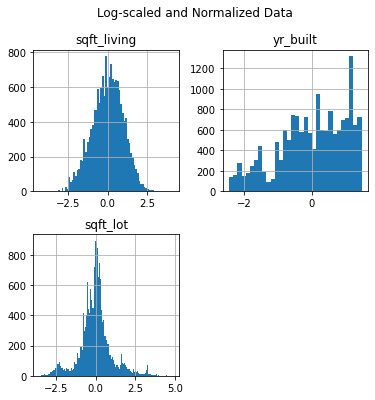

In [75]:
X_train[cont].hist(figsize=[6,6], bins='auto')
plt.suptitle("Log-scaled and Normalized Data");

Looking at the continuous variables, normalizing and log scaling allows these features to approximate more of a normal distribution and helps manage extreme outliers. 

The same methods are applied to the predictor variable price. By log scaling and normalizing, sale price approximates a normal distribution and the extreme outliers are accounted for. 

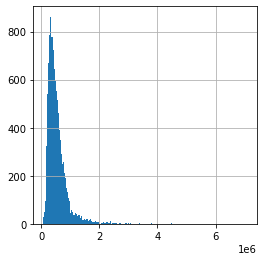

In [82]:
y_train.hist(figsize=[3,3], bins='auto');

In [98]:
y_train_log = np.log(y_train)

y_train_scaled = normalizer(y_train_log)

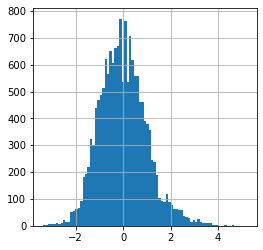

In [99]:
y_train_scaled.hist(figsize=[4,4], bins='auto');

In [105]:
X_train_log = sm.add_constant(X_train)

scaled_model = sm.OLS(y_train_scaled, X_train_log).fit()

scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1189.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:19:29   Log-Likelihood:                -14477.
No. Observations:               16150   AIC:                         2.901e+04
Df Residuals:                   16124   BIC:                         2.921e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.7405      9.842     -0.380      0.704     -23.032      15.551
sqft_living             0.3404      0.010     33.758      0.000       0.321       0.360
yr_built               -0.3178      0.007    -46.492      0.000      -0.331      -0.304
sqft_lot               -0.0846      0.006    -14.268      0.000      -0.096      -0.073
bedrooms               -0.0741      0.007    -10.508      0.000      -0.088      -0.060
bathrooms               0.1485      0.011     13.410      0.000       0.127       0.170
zipcode              4.837e-05      0.000      0.482      0.630      -0.000       0.000
floors                  0.0791      0.012      6.647      0.000       0.056       0.102
renovated_cat           0.1228      0.038      3.257      0.001       0.049       0.197
grade_11 Excellent      0.4085      0.040     10.088      0.000       0.329       0.488
grade_12 Luxury         0.8141      0.077     10.591      0.000       0.663       0.965
grade_13 Mansion        1.0303      0.212      4.869      0.000       0.616       1.445
grade_3 Poor          1.16e-13   1.55e-14      7.485      0.000    8.56e-14    1.46e-13
grade_4 Low            -2.2644      0.138    -16.402      0.000      -2.535      -1.994
grade_5 Fair           -2.1176      0.055    -38.645      0.000      -2.225      -2.010
grade_6 Low Average    -1.7465      0.033    -52.812      0.000      -1.811      -1.682
grade_7 Average        -1.3387      0.026    -51.499      0.000      -1.390      -1.288
grade_8 Good           -0.9163      0.024    -38.471      0.000      -0.963      -0.870
grade_9 Better         -0.4179      0.025    -16.987      0.000      -0.466      -0.370
condition_Fair         -0.3029      0.056     -5.454      0.000      -0.412      -0.194
condition_Good          0.0430      0.012      3.623      0.000       0.020       0.066
condition_Poor         -0.2834      0.128     -2.223      0.026      -0.533      -0.033
condition_Very Good     0.1477      0.019      7.815      0.000       0.111       0.185
view_EXCELLENT          0.6039      0.044     13.702      0.000       0.517       0.690
view_FAIR               0.1633      0.044      3.670      0.000       0.076       0.250
view_GOOD               0.0973      0.038      2.583      0.010       0.023       0.171
view_NONE              -0.1982      0.023     -8.491      0.000      -0.244      -0.152
==============================================================================
Omnibus:                       41.151   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.772
Skew:                          -0.039   Prob(JB):                     9.44e-12
Kurtosis:                       3.263   Cond. No.                     1.00e+16
================================================

**Model Performance**

Interestingly, this model has a lower R-squared score than the baseline model by about .0019 (1.9%). However, since this model has continuous variables that better approximate normality, so it will be used for further model iterations.  

In [106]:
summary = scaled_model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.loc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < .001].index)

print(len(p_table), len(x_cols))
p_table.head()

27 22


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,-3.7405,9.842,-0.380,0.704,-23.032,15.551
sqft_living,0.3404,0.010,33.758,0.000,0.321,0.360
yr_built,-0.3178,0.007,-46.492,0.000,-0.331,-0.304
sqft_lot,-0.0846,0.006,-14.268,0.000,-0.096,-0.073
bedrooms,-0.0741,0.007,-10.508,0.000,-0.088,-0.060


In [36]:
#using scikit learn
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [37]:
# y_hat_train = linreg.predict(X_train)
# y_hat_test = linreg.predict(X_test)
# train_residuals = y_hat_train - y_train
# test_residuals = y_hat_test - y_test

In [38]:
linreg.coef_

array([ 1.36240068e+02, -3.20521280e+03, -2.95042492e-01, -2.97982815e+04,
        4.90941329e+04, -5.76118591e+01,  3.58015758e+04,  1.09135287e+05,
        2.87869359e+05,  7.15278060e+05,  1.18502511e+06,  9.60426405e-09,
       -5.67419909e+05, -5.53425220e+05, -4.87765051e+05, -4.06978642e+05,
       -3.20160094e+05, -1.84884734e+05, -2.92613641e+04,  1.63057480e+04,
       -3.27821172e+04,  6.01966467e+04,  4.24239501e+05,  7.32756371e+04,
        6.71181399e+04, -6.27339554e+04])

In [39]:
linreg.intercept_

12533492.968023628

### Feature Selection

In [40]:
lingreg = LinearRegression()

In [41]:
selector = RFE(linreg, n_features_to_select=15)
selector = selector.fit(X_train, y_train)

In [42]:
selector.support_

array([False, False, False, False, False, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True])

In [43]:
selector.ranking_

array([ 9,  8, 11,  5,  2, 10,  7,  1,  1,  1,  1, 12,  1,  1,  1,  1,  1,
        1,  6,  3,  4,  1,  1,  1,  1,  1])

In [44]:
estimators = selector.estimator_

In [45]:
print(estimators.coef_, '\n', estimators.intercept_)

[ 233341.11758029  414771.4263391   987480.42968563 1685334.71492896
 -812711.98315036 -788175.29120103 -715494.30273183 -612541.28499224
 -485409.30871373 -275988.70302024  134935.91309979  467778.86580324
   74353.03155824   86680.1530818  -130521.10136196] 
 1121663.3227982111


In [46]:
selected_columns = X_train.columns[selector.support_]

In [47]:
linreg.fit(X_train[selected_columns], y_train)

LinearRegression()

In [48]:
selected_columns

Index(['renovated_cat', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Very Good', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE'],
      dtype='object')